# AAAI2019 論文標題的文字雲

### 取出論文標題
- 每個csv檔案中的第1行

### 前處理
- 斷詞
- 大小寫統一
- 詞形還原
- 去除stopword

### 顯示文字雲
- 以詞頻顯示
- 以pyplot功能繪圖

In [1]:
import os
import numpy as np
import pandas as pd
from collections import Counter
import nltk
from nltk.stem.porter import PorterStemmer
from nltk.stem.lancaster import LancasterStemmer
from nltk.stem import SnowballStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from string import punctuation
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
from PIL import Image

### 初始化

In [2]:
porter_stemmer = PorterStemmer()
lancaster_stemmer = LancasterStemmer()
snowball_stemmer = SnowballStemmer('english')
wordnet_lemmatizer = WordNetLemmatizer()
stop_words = stopwords.words('english')

### 自定義函數

In [3]:
def get_all_titles():
    all_titles = ''
    dataset_path = '../dataset'
    for file in os.listdir(dataset_path):
        file_path = os.path.join(dataset_path, file)
        if os.path.isfile(file_path):
            with open(file_path) as f:  
                line = f.readlines()[0].strip()
                all_titles = line + str(' ') + all_titles
        else:
            print(file_path + ' does not exist.')
    return all_titles[:-2]

### 主程式，開始處理

In [4]:
contents = get_all_titles()

print(contents[:100])

Online Multi-Agent Pathfinding Sentence-Wise Smooth Regularization for Sequence to Sequence Learning


### 去標點

In [5]:
contents = contents.replace('.',' ')
contents = contents.replace(',',' ')

print(contents[:100])

Online Multi-Agent Pathfinding Sentence-Wise Smooth Regularization for Sequence to Sequence Learning


### tokenize (斷詞)

In [6]:
#tokens = nltk.wordpunct_tokenize(contents)
tokens = nltk.word_tokenize(contents)

print(len(tokens))
print(tokens[:30])

11944
['Online', 'Multi-Agent', 'Pathfinding', 'Sentence-Wise', 'Smooth', 'Regularization', 'for', 'Sequence', 'to', 'Sequence', 'Learning', 'Spatial-Temporal', 'Person', 'Re-Identification', 'CAPNet', ':', 'Continuous', 'Approximation', 'Projection', 'for', '3D', 'Point', 'Cloud', 'Reconstruction', 'Using', '2D', 'Supervision', 'Abstractive', 'Text', 'Summarization']


### stemming and lemmatize (詞形還原)

In [7]:
#tokens_stemmed = [porter_stemmer.stem(t) for t in tokens]
tokens_stemmed = [wordnet_lemmatizer.lemmatize(t.lower()) for t in tokens]

print(tokens_stemmed[:30])

['online', 'multi-agent', 'pathfinding', 'sentence-wise', 'smooth', 'regularization', 'for', 'sequence', 'to', 'sequence', 'learning', 'spatial-temporal', 'person', 're-identification', 'capnet', ':', 'continuous', 'approximation', 'projection', 'for', '3d', 'point', 'cloud', 'reconstruction', 'using', '2d', 'supervision', 'abstractive', 'text', 'summarization']


### stop words

In [8]:
tokens_filtered = [t for t in tokens_stemmed if not t in stop_words] 

print(tokens_filtered[:30])

['online', 'multi-agent', 'pathfinding', 'sentence-wise', 'smooth', 'regularization', 'sequence', 'sequence', 'learning', 'spatial-temporal', 'person', 're-identification', 'capnet', ':', 'continuous', 'approximation', 'projection', '3d', 'point', 'cloud', 'reconstruction', 'using', '2d', 'supervision', 'abstractive', 'text', 'summarization', 'incorporating', 'reader', 'comment']


### 產生文字雲(方式一：用plt)

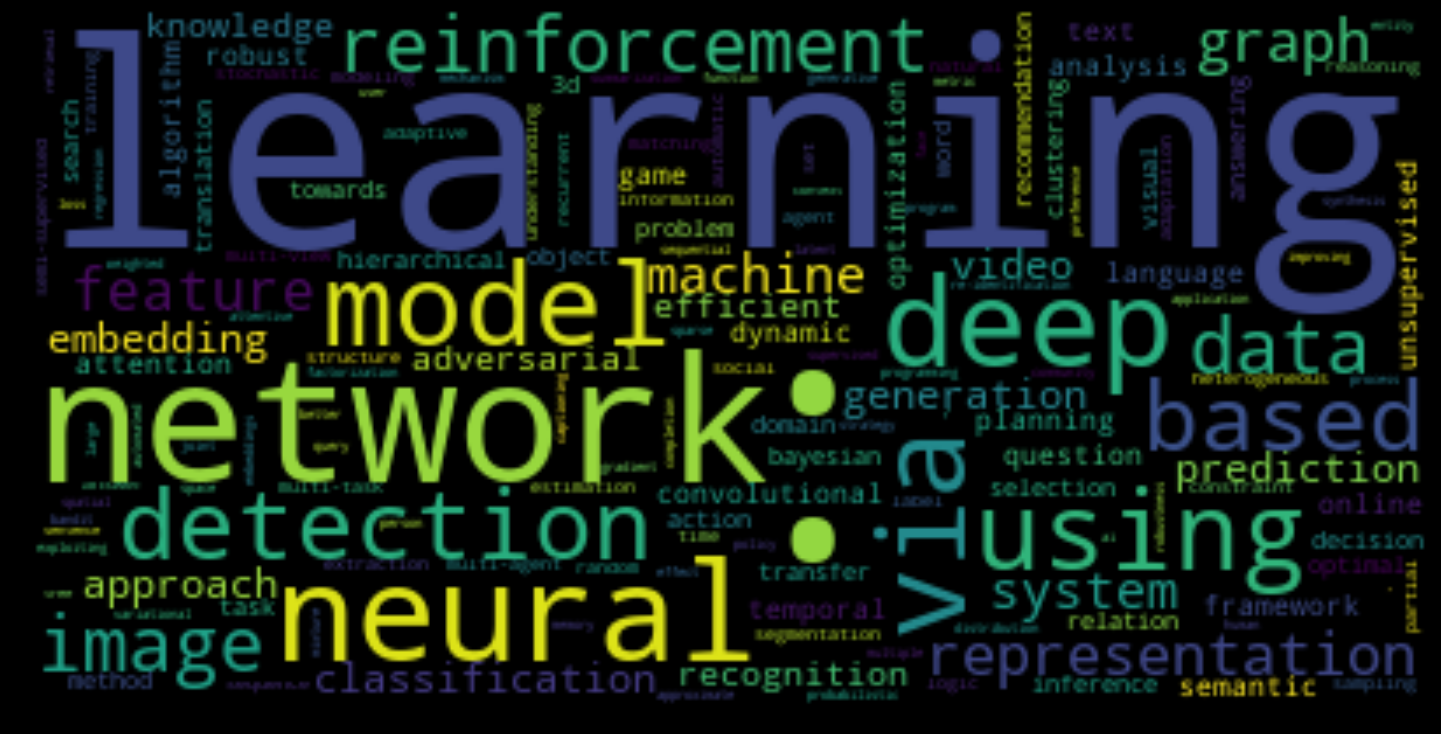

In [9]:
#wc = WordCloud().generate(contents)
wc = WordCloud().generate_from_frequencies(frequencies=Counter(tokens_filtered))

plt.figure(figsize=(20,10), facecolor='k')
plt.imshow(wc,interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

### 方式二：用word cloud

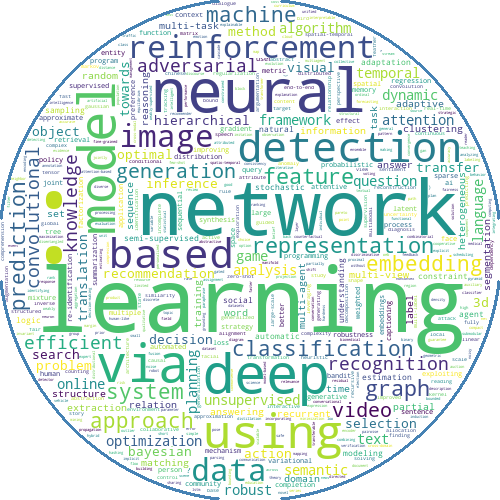

In [10]:
font_path = '../tools/msjh.ttc'
mask = np.array(Image.open("../images/circle.png"))

wc2 = WordCloud(background_color = "white",
                       max_words = 2000,
                       mask = mask,
                       stopwords = stop_words,
                       max_font_size = None,
                       #font_path = font_path,
                       random_state = None,
                       prefer_horizontal = 0.9,
                       contour_width = 3,
                       contour_color = 'steelblue')
#wc2.generate(contents)
wc2.generate_from_frequencies(frequencies=Counter(tokens_filtered))
wc2.to_image()